## Name: Vishwas Sunil Kshirsagar


## Task 2: Prediction using Unsupervised ML

### Problem Statement: 'Iris Dataset', Predict the optimum number of clusters and represent it visually.

In [2]:
# Importing all the neccessary libraries

import pandas as pd  # to analyze data
import numpy as np  # to perform a wide variety of mathematical operations on arrays
import seaborn as sns # to visualize random distributions.
import matplotlib.pyplot as plt # to perform data visualization and graphical plotting
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler # to scale the data
from sklearn.cluster import KMeans  # to perform Kmeans Unsuprvised algorithm

## First Step: Upload and read the dataset

In [3]:
iris = pd.read_csv("C:/The Spark Foundation/Iris.csv")

## Second Step: EDA (Exploratory Data Analysis)

In [5]:
#print first 5 records

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Print last 5 records

iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
# Print the all the unique species

iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Print the null values if there are any

iris.isnull().sum()  # there is no null values in the dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# print the information of the data variables(data type etc.)

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
# print the 5 point summary

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Since this is an Unsupervised learning, we'll have to drop target variable ('Species') and 'Id' columns

In [13]:
iris.drop(["Species", "Id"], axis = 1, inplace = True)

In [15]:
# to check whether these above columns have dropped.

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# Setting up all the columns in 'columns'

columns = ["SepalLengthCM", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

## Third Step: Data Visualization

<AxesSubplot:xlabel='SepalLengthCm'>

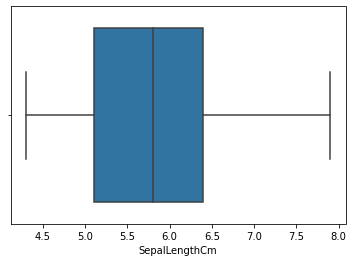

In [18]:
# draw boxplot "SepalLengthCm"

sns.boxplot(x=iris["SepalLengthCm"])

<AxesSubplot:xlabel='SepalWidthCm'>

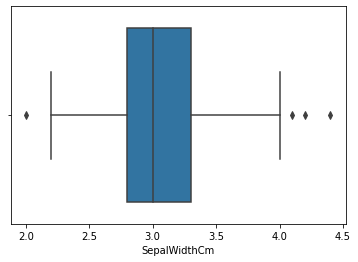

In [19]:
# draw boxplot "SepalWidthCm"

sns.boxplot(x=iris["SepalWidthCm"])

<AxesSubplot:xlabel='PetalLengthCm'>

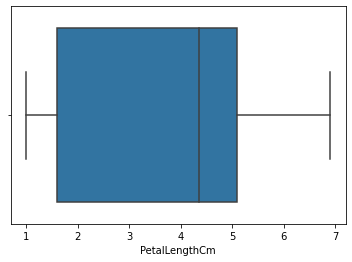

In [20]:
# draw boxplot "PetalLengthCm"

sns.boxplot(x=iris["PetalLengthCm"])

<AxesSubplot:xlabel='PetalWidthCm'>

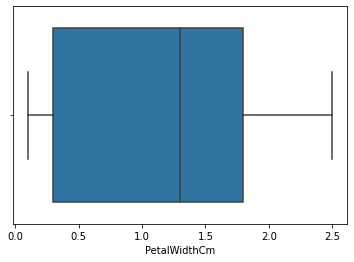

In [21]:
# draw boxplot "PetalWidthCm"

sns.boxplot(x=iris["PetalWidthCm"])

### With the above graphs we can interpret that the 'SepalWidthCm' have outliers and we have to drop outliers.

## Forth Step: Getting rid of the outliers using MinMaxScaler

In [22]:
# Defining and saving the 'MinMax Scaler' function in 'scaler'

scaler = MinMaxScaler()

In [23]:
x = scaler.fit_transform(iris)

In [25]:
# printing 'x' transform 'iris' data values
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## Fifth Step: Creating a best fit cluster model

In [28]:
b_f_clusters = range(2,10)

iris_m = []

In [32]:
for i in b_f_clusters:
    kmeans = KMeans(n_clusters=i, init = "k-means++", random_state=420)
    kmeans.fit(x)
    labels = kmeans.predict(x)
    iris_m.append(kmeans.inertia_)

## Sixth Step: Plotting The Elbow Graph

In [33]:
len(b_f_clusters) # to fing the length of total number of clusters

8

In [34]:
len(iris_m) # to find the length of iris_m

8

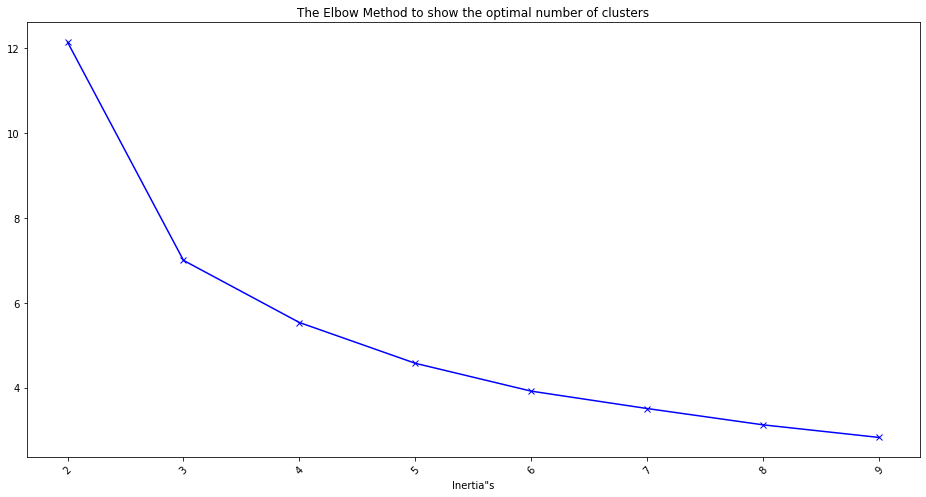

In [37]:
# plotting the graph

plt.figure(figsize=(16,8))
plt.plot(b_f_clusters, iris_m, "bx-")
plt.xticks(b_f_clusters)
plt.title("The Elbow Method to show the optimal number of clusters")
plt.xlabel("Inertia\"s")
plt.xticks(rotation=(45))
plt.show()

### From the graph we can infer that the clusters 3 is the optimal cluster to fit the model.

## Seventh Step: Build the Model

In [39]:
model = KMeans(n_clusters= 3, random_state=420)

In [40]:
# fit the model

model.fit(x)

KMeans(n_clusters=3, random_state=420)

In [41]:
labels = model.predict(x)

In [42]:
model.inertia_

6.998114004826762

In [48]:
model.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

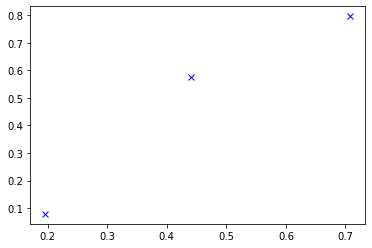

In [49]:
# plotting the clusters graph

centers_x, centers_y =model.cluster_centers_[:,0], model.cluster_centers_[:,2]

# plot the graph
plt.plot(centers_x, centers_y, "xb")

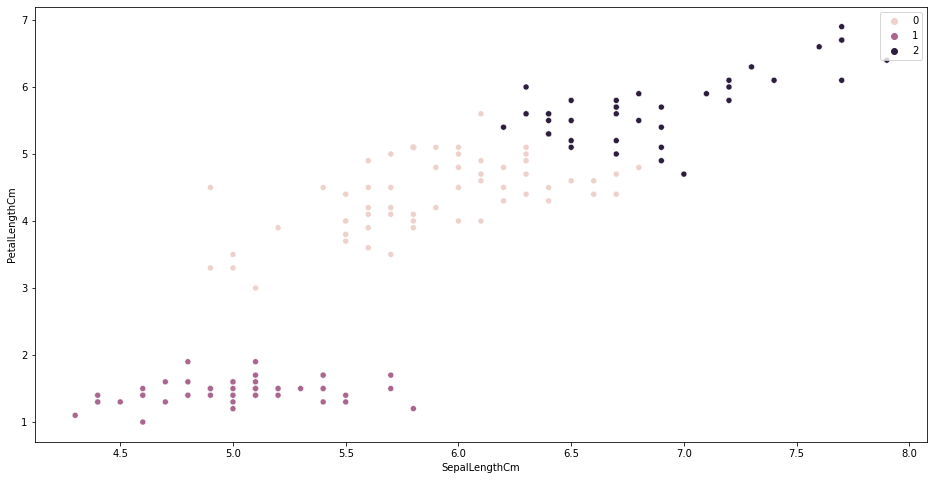

In [50]:
# Plot the graph wiht 'SepalLengthCM' and 'PetalLengthCm'

plt.figure(figsize=(16,8))
sns.scatterplot(x=iris["SepalLengthCm"], y = iris["PetalLengthCm"], hue= labels)

plt.show()

## Eight Step: Evaluation

### With the help of KMeans clustering we can infer that the clusters 3 is the best fit option to get the best model and segreagate data into the right clusters. 